<a href="https://colab.research.google.com/github/hubertrykala93/extinguisher_fire_classification_predict/blob/main/extinguisher_fire_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [91]:
import pandas
import pandas as pd
import numpy
import numpy as np
import seaborn as sns
import seaborn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier, RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [92]:
np.set_printoptions(suppress=True, edgeitems=30, linewidth=100000)
np.random.seed(42)

In [93]:
sns.set()

In [94]:
desired_width = 320
pd.options.display.float_format = '{:,.8f}'.format
pd.set_option('display.width', desired_width)
pd.set_option('display.max_columns', 100)

In [95]:
path = '/content/Acoustic_Extinguisher_Fire_Dataset.xlsx'

In [96]:
# Importing data
raw_data = pd.read_excel(io=path, sheet_name='A_E_Fire_Dataset')
data = raw_data.copy()

In [97]:
data.sample(n=10)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
15033,5,kerosene,130,105,5.60000000,35,0
2471,3,gasoline,80,88,9.30000000,13,1
450,1,gasoline,90,106,11.00000000,40,1
19,1,gasoline,10,111,15.50000000,38,1
3298,4,gasoline,50,101,0.00000000,67,0
16933,7,lpg,100,103,6.50000000,23,1
6351,2,thinner,40,89,13.10000000,21,1
11557,2,kerosene,60,102,0.00000000,72,0
6215,2,thinner,20,105,6.50000000,66,1
4450,5,gasoline,70,106,13.00000000,34,1


In [98]:
data.head(n=10)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,gasoline,10,96,0.00000000,75,0
1,1,gasoline,10,96,0.00000000,72,1
2,1,gasoline,10,96,2.60000000,70,1
3,1,gasoline,10,96,3.20000000,68,1
4,1,gasoline,10,109,4.50000000,67,1
5,1,gasoline,10,109,7.80000000,66,1
6,1,gasoline,10,103,9.70000000,65,1
7,1,gasoline,10,95,12.00000000,60,1
8,1,gasoline,10,102,13.30000000,55,1
9,1,gasoline,10,93,15.40000000,52,1


In [99]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
SIZE,"17,442.00000000",3.41176471,1.75097679,1.00000000,2.00000000,3.00000000,5.00000000,7.00000000
DISTANCE,"17,442.00000000",100.00000000,54.77382594,10.00000000,50.00000000,100.00000000,150.00000000,190.00000000
DESIBEL,"17,442.00000000",96.37914230,8.16409641,72.00000000,90.00000000,95.00000000,104.00000000,113.00000000
AIRFLOW,"17,442.00000000",6.97563353,4.73616898,0.00000000,3.20000000,5.80000000,11.20000000,17.00000000
FREQUENCY,"17,442.00000000",31.61111111,20.93914939,1.00000000,14.00000000,27.50000000,47.00000000,75.00000000
STATUS,"17,442.00000000",0.49782135,0.50000959,0.00000000,0.00000000,0.00000000,1.00000000,1.00000000


In [100]:
data.isnull().sum()

SIZE         0
FUEL         0
DISTANCE     0
DESIBEL      0
AIRFLOW      0
FREQUENCY    0
STATUS       0
dtype: int64

In [101]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17442 entries, 0 to 17441
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   SIZE       17442 non-null  int64  
 1   FUEL       17442 non-null  object 
 2   DISTANCE   17442 non-null  int64  
 3   DESIBEL    17442 non-null  int64  
 4   AIRFLOW    17442 non-null  float64
 5   FREQUENCY  17442 non-null  int64  
 6   STATUS     17442 non-null  int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 954.0+ KB


SIZE has 7 unique values.
FUEL has 4 unique values.
DISTANCE has 19 unique values.
DESIBEL has 39 unique values.
AIRFLOW has 127 unique values.
FREQUENCY has 54 unique values.
STATUS has 2 unique values.


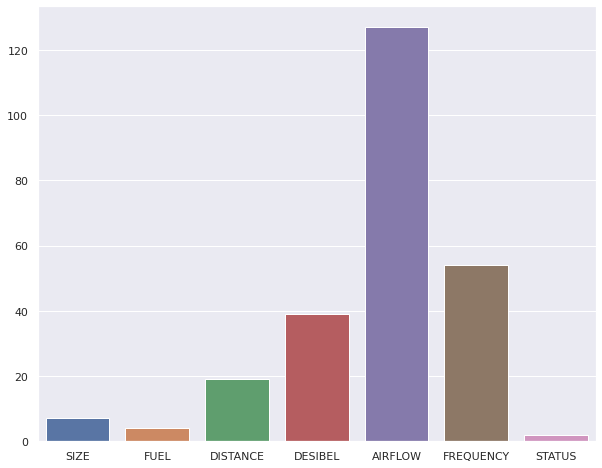

In [102]:
# Checking number of unique variables and creating bar chart
for column in data.columns:
  print(f'{column} has {data[column].nunique()} unique values.')

plt.figure(figsize=(10, 8))
sns.barplot(x=data.columns, y=data.nunique())
plt.show()

<Figure size 720x576 with 0 Axes>

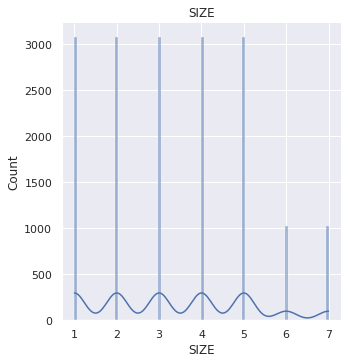

<Figure size 720x576 with 0 Axes>

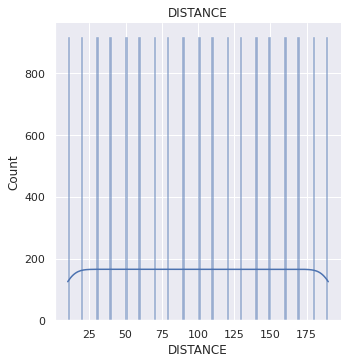

<Figure size 720x576 with 0 Axes>

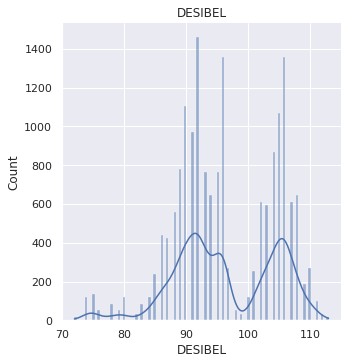

<Figure size 720x576 with 0 Axes>

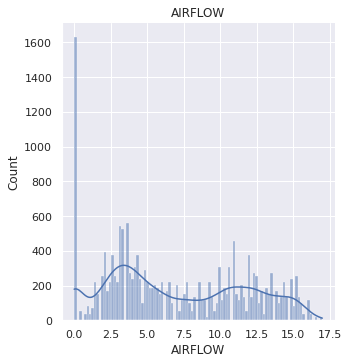

<Figure size 720x576 with 0 Axes>

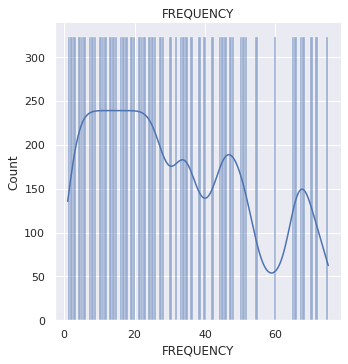

<Figure size 720x576 with 0 Axes>

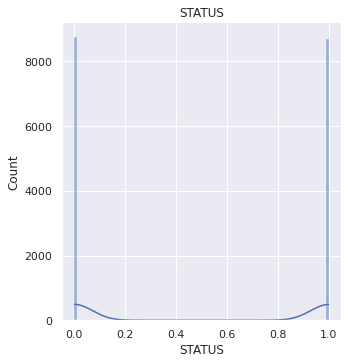

In [103]:
# Making histogram for each column
for column in data.columns:
    if data[column].dtype != 'object':
        plt.figure(figsize=(10, 8))
        sns.displot(data=data, x=column, bins=100, kde=True)
        plt.title(label=column)
        plt.show()

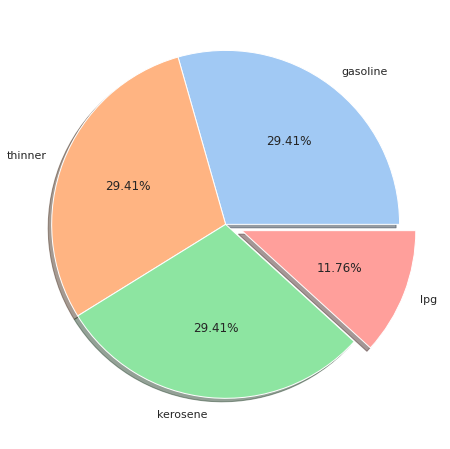

In [104]:
# Checking distribution variables in 'FUEL' column
plt.figure(figsize=(10, 8))
colors = sns.color_palette('pastel')[0:4]
plt.pie(x=data['FUEL'].value_counts(), labels=data['FUEL'].value_counts().index,
        autopct='%.2f%%', colors=colors, explode=[0, 0, 0, 0.1], shadow=True)
plt.show()

In [105]:
# Encoding 'FUEL' column
encoder = OrdinalEncoder()
data['FUEL'] = encoder.fit_transform(X=data[['FUEL']])

In [106]:
data.head(n=5)

,SIZE,FUEL,DISTANCE,DESIBEL,AIRFLOW,FREQUENCY,STATUS
0,1,0.00000000,10,96,0.00000000,75,0
1,1,0.00000000,10,96,0.00000000,72,1
2,1,0.00000000,10,96,2.60000000,70,1
3,1,0.00000000,10,96,3.20000000,68,1
4,1,0.00000000,10,109,4.50000000,67,1


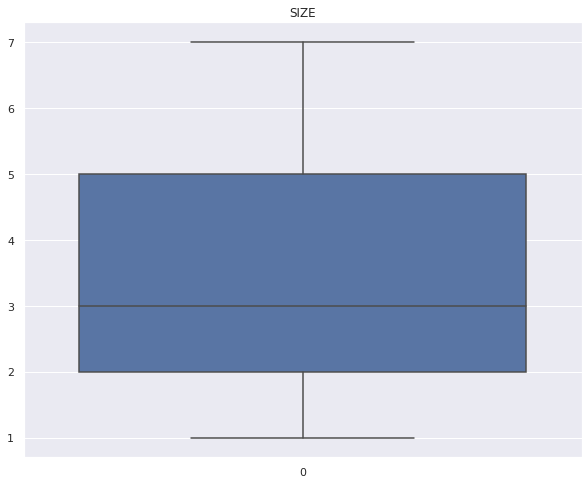

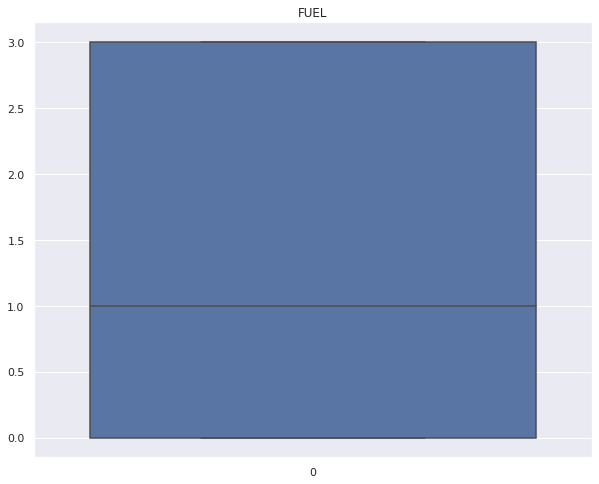

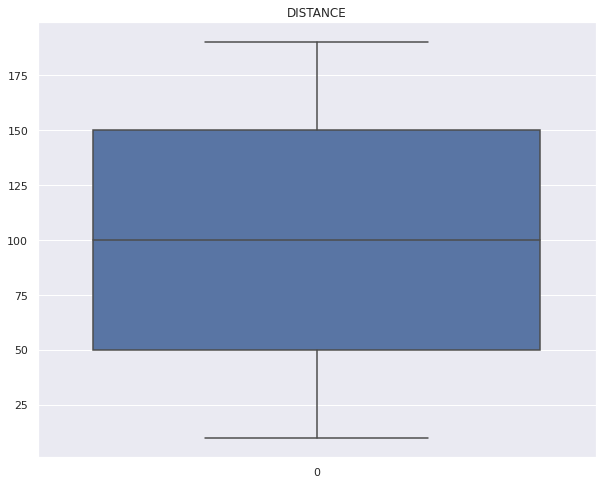

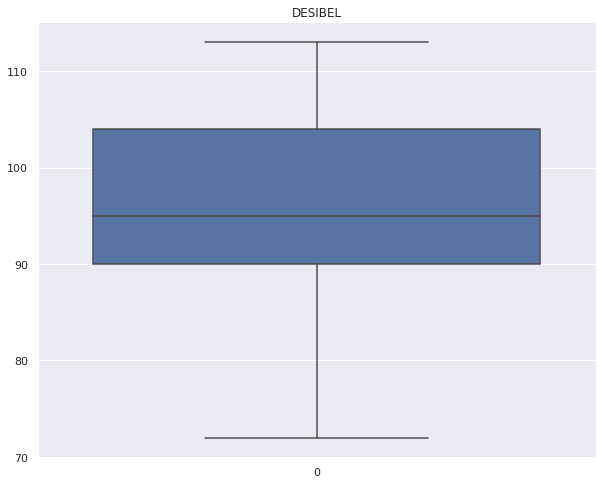

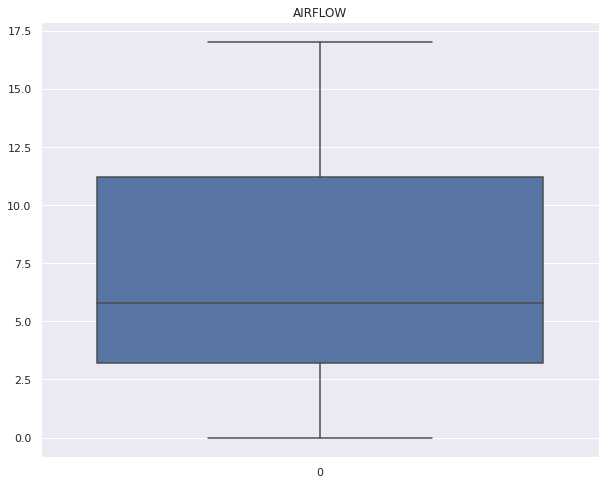

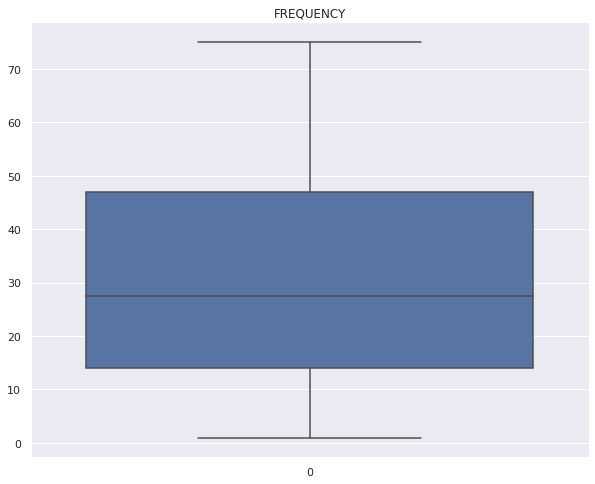

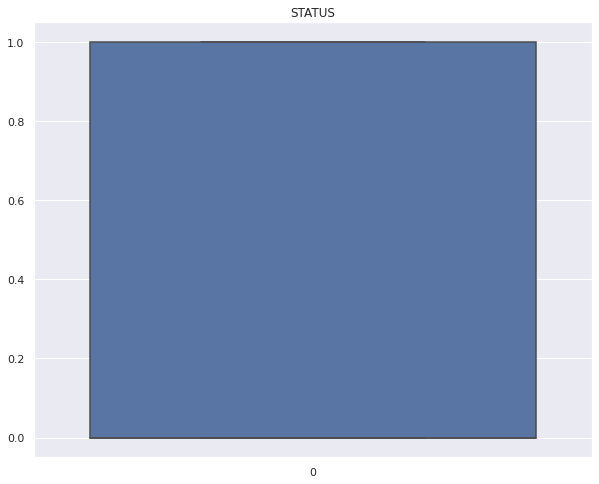

In [107]:
# Checking boxplots for detecting outliers
for column in data.columns:
  if data[column].dtype != 'object':
    plt.figure(figsize=(10, 8))
    sns.boxplot(data=data[column])
    plt.title(label=column)
    plt.show()

In [108]:
# Making X, y, training and test set
X = data.drop(columns='STATUS')
y = data['STATUS']

In [109]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,
                                                    random_state=42)

In [110]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (12209, 6)
X_test shape: (5233, 6)
y_train shape: (12209,)
y_test shape: (5233,)


In [111]:
# Scalling data
scaler = StandardScaler()

X_train = scaler.fit_transform(X=X_train)
X_test = scaler.transform(X=X_test)

In [112]:
# Detecting for the best classification model
models_list = []

models_list.append([GradientBoostingClassifier(), RandomForestClassifier(),
                    AdaBoostClassifier(), SVC(), DecisionTreeClassifier(),
                    SGDClassifier(), RidgeClassifier(), KNeighborsClassifier(),
                    MLPClassifier(max_iter=500), GaussianNB(), LogisticRegression()])

def models_scores(y_test: numpy.ndarray, models_list: list,
                  is_plot_visible=False) -> pandas.DataFrame:
    """
    Searching the best prediction model from the list and results visualization
    on bar chart and DataFrame.
    :param y_test: pandas.DataFrame
    :param models_list: list
    :param is_plot_visible: boolean
    :return: pandas.DataFrame, seaborn.barplot
    """

    scores = []
    y_preds = []

    for model in models_list[0]:
        classifier = model
        classifier.fit(X=X_train, y=y_train)
        y_pred = classifier.predict(X=X_test)
        score = accuracy_score(y_true=y_test, y_pred=y_pred)

        y_preds.append(pd.Series(data=y_pred))
        scores.append(score)

    i = 0

    while i != len(y_preds):
        positive = []
        negative = []

        for _ in y_preds:
            y_test = y_test.reset_index(drop=True)
            new_series = pd.concat(objs=[y_test, y_preds[i]], axis='columns').rename(mapper={
                'STATUS': 'y_test',
                0: 'y_pred'
            }, axis='columns')

            positive.append(len(new_series[new_series['y_test'] == new_series['y_pred']]))
            negative.append(len(new_series[new_series['y_test'] != new_series['y_pred']]))

            i += 1

    names = [str(model)[:str(model).index('(')] for model in models_list[0]]

    results = pd.DataFrame(data={
        'name': names,
        'scores': scores,
        'prediction_successful': positive,
        'prediction_failed': negative,
    })

    if is_plot_visible:
        plt.figure(figsize=(12, 8))
        sns.barplot(x=scores, y=names,
                    orient='h')
        plt.show()

    return results.sort_values(by='scores', ascending=False).reset_index(drop=True)

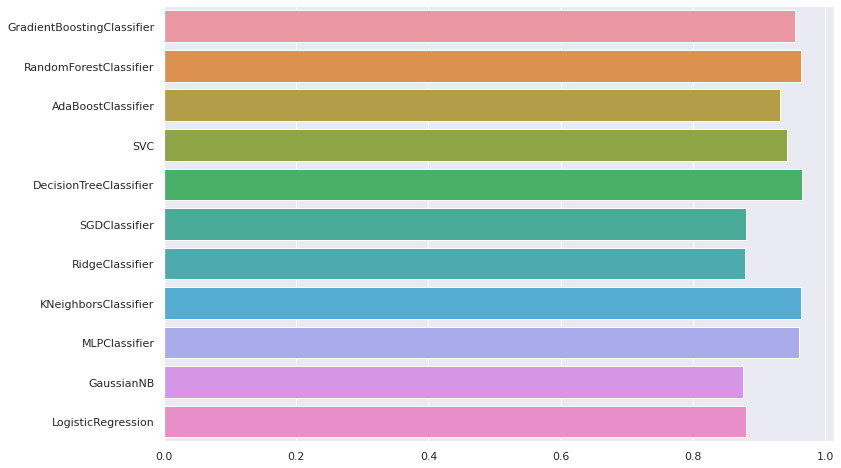

,name,scores,prediction_successful,prediction_failed
0,DecisionTreeClassifier,0.96426524,5046,187
1,RandomForestClassifier,0.96388305,5044,189
2,KNeighborsClassifier,0.96273648,5038,195
3,MLPClassifier,0.96063444,5027,206
4,GradientBoostingClassifier,0.95432830,4994,239
5,SVC,0.94152494,4927,306
6,AdaBoostClassifier,0.93139690,4874,359
7,SGDClassifier,0.87961017,4603,630
8,LogisticRegression,0.87941907,4602,631
9,RidgeClassifier,0.87903688,4600,633


In [113]:
models_scores(y_test=y_test, models_list=models_list, is_plot_visible=True)

In [114]:
# Creating model
classification_model = DecisionTreeClassifier()
classification_model.fit(X=X_train, y=y_train)
y_pred = classification_model.predict(X=X_test)

In [115]:
print(f'Accuracy score of Decision Tree Classifier is {accuracy_score(y_true=y_test, y_pred=y_pred)}.')

Accuracy score of Decision Tree Classifier is 0.9644563347983948.


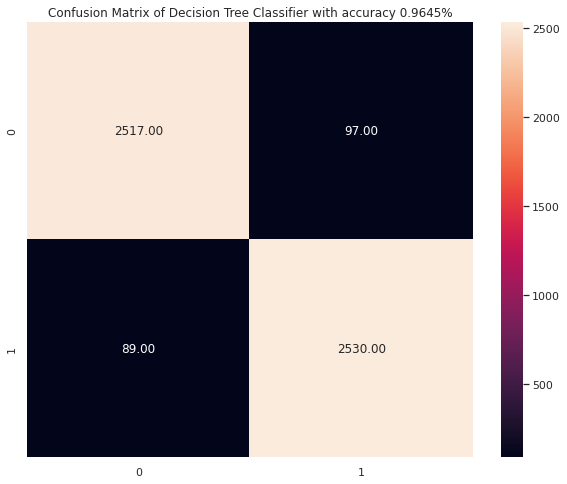

In [116]:
# Confusion Matrix visualization for Decision Tree Classifier
plt.figure(figsize=(10, 8))
sns.heatmap(data=confusion_matrix(y_true=y_test, y_pred=y_pred),
            annot=True, fmt='.2f')
plt.title(label=f'Confusion Matrix of Decision Tree Classifier with \
accuracy {accuracy_score(y_true=y_test, y_pred=y_pred):.4f}%')
plt.show()

In [117]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96      2614
           1       0.96      0.97      0.96      2619

    accuracy                           0.96      5233
   macro avg       0.96      0.96      0.96      5233
weighted avg       0.96      0.96      0.96      5233



In [118]:
result = pd.DataFrame(data={
    'y_true': y_test,
    'y_pred': y_pred
}).reset_index(drop=True)

In [119]:
result

,y_true,y_pred
0,0,0
1,1,1
2,1,1
3,1,1
4,0,0
...,...,...
5228,1,1
5229,1,1
5230,0,0
5231,0,0


In [120]:
# Creating csv file with results
result.to_csv(path_or_buf='/content/extinguisher_fire_predictions.csv')